In [60]:
#Imported the Dataset into Pandas DataFrame
import pandas as pd
df=pd.read_csv(r"/content/Eluvio_DS_Challenge.csv",error_bad_lines=False,engine="python")

In [61]:
#Loaded DataFrame
df

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews


In [62]:
#Imported nltk library
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [63]:
#Converted the text into lower case, removed emoji patterns
import re
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)
df['Cleaned_title'] = (df['title'].str.lower().str.replace(r'[^\w\s]+', '').str.replace(emoji_pattern, '').str.strip())

In [64]:
#Tokenization performed in below Function or Module
def identify_tokens(row):
    review = row['Cleaned_title']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [65]:
#Stemming performed in below Function or Module
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
def stem_list(row):
    my_list = row['Cleaned_title']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

In [66]:
#Lemmatization performed in below function or module
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def lem_list(row):
    my_list = row['Cleaned_title']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (lemmatized_list)

In [67]:
#Removing stop words from the text
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))                  

def remove_stops(row):
    my_list = row['Cleaned_title']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

In [68]:
#Rejoining Title
def rejoin_words(row):
    my_list = row['Cleaned_title']
    joined_words = ( " ".join(my_list))
    return joined_words

In [69]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Cleaned_title'] = df['Cleaned_title'].str.lower()     #changed to lower case
df = df.drop_duplicates(subset=['Cleaned_title'])  #duplicated removed
#Function calls of above defined modules

df['Cleaned_title'] = df.apply(identify_tokens, axis=1)
df['Cleaned_title'] = df.apply(remove_stops, axis=1)
cleaned_list=df['Cleaned_title'].to_list()
df['Cleaned_title'] = df.apply(stem_list, axis=1)
df['Cleaned_title'] = df.apply(lem_list, axis=1)
df['Cleaned_title'] = df.apply(rejoin_words, axis=1)

#A new column in 'df' Frame is added as last column which is the cleaned title after preprocessing procedures on 'title' column
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,Cleaned_title
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,score kill pakistan clash
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,japan resum refuel mission
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,u press egypt gaza border
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,jumpstart economi give health care
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,council europ bash euun terror blacklist
...,...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews,heil trump donald trump altright white nationa...
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews,peopl specul could madelein mccann
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,professor receiv arab research award
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,nigel farag attack respons trump ambassador tweet


In [ ]:
#1. What are the top 25 frequent words in the given text?
import itertools
freq = nltk.FreqDist(list(itertools.chain.from_iterable(cleaned_list)))
result_1= pd.DataFrame(freq.most_common(25))
result_1.columns=['Top word','Word frequency']
result_1

,Top word,Word frequency
0,us,38257
1,says,24580
2,china,23787
3,new,22945
4,syria,17637
5,russia,16873
6,world,16396
7,police,16290
8,government,15012
9,israel,14713


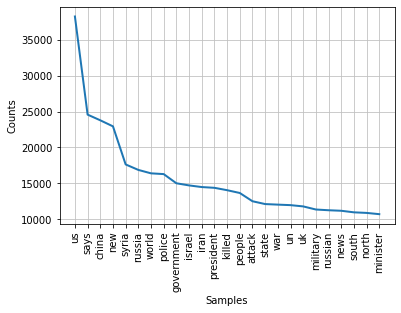

In [ ]:
freq.plot(25, cumulative=False)

In [ ]:
#2. What are the top 25 repeated features of the text?
#Top 25 Bigrams
import itertools
from nltk import bigrams
from collections import Counter
from operator import itemgetter
data=list(itertools.chain.from_iterable(cleaned_list))
gram_2=bigrams(data, pad_right=True, pad_left=True)
key_value=dict(Counter(gram_2))
res = dict(sorted(key_value.items(), key = itemgetter(1), reverse = True)[:25])
res

{('al', 'qaeda'): 1205,
 ('bbc', 'news'): 4102,
 ('boko', 'haram'): 1609,
 ('chemical', 'weapons'): 1310,
 ('china', 'sea'): 1646,
 ('climate', 'change'): 2207,
 ('death', 'toll'): 1429,
 ('first', 'time'): 1712,
 ('foreign', 'minister'): 1296,
 ('hong', 'kong'): 1950,
 ('human', 'rights'): 3459,
 ('islamic', 'state'): 4885,
 ('middle', 'east'): 1772,
 ('new', 'zealand'): 1475,
 ('north', 'korea'): 6627,
 ('north', 'korean'): 1470,
 ('pope', 'francis'): 1223,
 ('prime', 'minister'): 4655,
 ('saudi', 'arabia'): 3278,
 ('south', 'africa'): 1512,
 ('south', 'china'): 1543,
 ('south', 'korea'): 2489,
 ('united', 'states'): 2175,
 ('war', 'crimes'): 1253,
 ('west', 'bank'): 1698}

In [ ]:
#Top 25 Trigrams
gram_3=nltk.ngrams(data,3)
key_value=dict(Counter(gram_3))
res_3 = dict(sorted(key_value.items(), key = itemgetter(1), reverse = True)[:25])
res_3

{('al', 'jazeera', 'english'): 467,
 ('central', 'african', 'republic'): 556,
 ('chancellor', 'angela', 'merkel'): 272,
 ('death', 'toll', 'rises'): 283,
 ('first', 'time', 'since'): 262,
 ('great', 'barrier', 'reef'): 303,
 ('human', 'rights', 'watch'): 441,
 ('international', 'criminal', 'court'): 305,
 ('iran', 'nuclear', 'deal'): 237,
 ('islamic', 'state', 'group'): 279,
 ('islamic', 'state', 'militants'): 325,
 ('kim', 'jong', 'un'): 448,
 ('least', 'people', 'killed'): 283,
 ('new', 'york', 'times'): 346,
 ('nobel', 'peace', 'prize'): 342,
 ('nuclear', 'power', 'plant'): 286,
 ('osama', 'bin', 'laden'): 385,
 ('papua', 'new', 'guinea'): 240,
 ('president', 'barack', 'obama'): 311,
 ('president', 'bashar', 'alassad'): 402,
 ('president', 'vladimir', 'putin'): 358,
 ('south', 'china', 'sea'): 1464,
 ('un', 'human', 'rights'): 261,
 ('un', 'security', 'council'): 562,
 ('world', 'war', 'ii'): 307}

In [ ]:
#Feature Extraction
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
count=0
doc_tokenized = [simple_preprocess(doc) for doc in df['Cleaned_title'].tolist()]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
print("words and their frequencies in our documents 'Displayed only 10':")
for doc in BoW_corpus:
  count=count+1
  if(count<=10):
    print([[dictionary[id], freq] for id, freq in doc])
  else:
    break
import numpy as np
tfidf = gensim.models.TfidfModel(BoW_corpus, smartirs='ntc')
#For the purpose of ease, I'm displaying tf-idf score of first 10 documents. However the score are calculated for all the documents.
print('\n\n Words and their frequencies in our Tf-idf modeled corpus (Displayed only 10):')
count=0
for doc in tfidf[BoW_corpus]:
  count=count+1
  if(count<=10):
    print([[dictionary[id], np.around(freq,decimals=2)] for id, freq in doc])
  else:
    break
   

words and their frequencies in our documents 'Displayed only 10':
[['clash', 1], ['kill', 1], ['pakistan', 1], ['score', 1]]
[['japan', 1], ['mission', 1], ['refuel', 1], ['resum', 1]]
[['border', 1], ['egypt', 1], ['gaza', 1], ['press', 1]]
[['care', 1], ['economi', 1], ['give', 1], ['health', 1], ['jumpstart', 1]]
[['bash', 1], ['blacklist', 1], ['council', 1], ['europ', 1], ['euun', 1], ['terror', 1]]
[['bale', 1], ['behind', 1], ['castl', 1], ['farmer', 1], ['hay', 2], ['hide', 1], ['illeg', 1], ['mocktudor', 1], ['presto', 1], ['tri', 1], ['unveil', 1]]
[['border', 1], ['gridlock', 1], ['polandukrain', 1], ['protest', 1], ['strike', 1]]
[['mismanag', 1], ['program', 1], ['un', 1]]
[['nicola', 1], ['ryanair', 1], ['sarkozi', 1], ['sue', 1], ['threaten', 1]]
[['met', 1], ['missil', 1], ['plan', 1], ['polish', 1], ['resist', 1], ['shield', 1], ['town', 1], ['video', 1]]


 words and their frequencies in our tfidf modeled corpus (Displayed only 10):
[['clash', 0.51], ['kill', 0.3], ['

In [ ]:
#What are the top 10 discussed topics in the text (Topic Modelling)? 
#Probabilistic Topic modelling Technique (Latent Dirichlet Allocation) (Unsupervised Machine Learning technique)
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.tokenize import RegexpTokenizer
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# I'm bulding bi-gram & trigrams again because the below algorithm takes in the input in a specific format Ex: word1_word2
bigram = gensim.models.Phrases(cleaned_list, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[cleaned_list], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
data_words_bigrams = make_bigrams(cleaned_list)
data_words_trigrams=make_trigrams(data_words_bigrams)

In [ ]:
id2word = corpora.Dictionary(data_words_trigrams)

#Corpus is data_words_trigrams
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words_trigrams]

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


In [ ]:
#Finally printing the top 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"government" + 0.030*"attack" + 0.022*"iraqi" + 0.022*"forces" + '
  '0.019*"war" + 0.014*"french" + 0.014*"yemen" + 0.013*"warns" + '
  '0.009*"woman" + 0.009*"top"'),
 (1,
  '0.034*"world" + 0.030*"bbc_news" + 0.026*"deal" + 0.024*"japan" + '
  '0.019*"may" + 0.015*"state" + 0.014*"pm" + 0.013*"france" + 0.012*"troops" '
  '+ 0.012*"calls"'),
 (2,
  '0.039*"president" + 0.022*"south" + 0.013*"israel" + 0.012*"found" + '
  '0.012*"man" + 0.012*"battle" + 0.012*"sea" + 0.011*"law" + 0.010*"death" + '
  '0.010*"paris"'),
 (3,
  '0.031*"uk" + 0.017*"years" + 0.016*"one" + 0.016*"children" + 0.015*"army" '
  '+ 0.014*"least" + 0.012*"trade" + 0.012*"chief" + 0.011*"putin" + '
  '0.011*"global"'),
 (4,
  '0.036*"killed" + 0.026*"people" + 0.022*"mosul" + 0.021*"two" + '
  '0.019*"indian" + 0.019*"report" + 0.018*"court" + 0.015*"leader" + '
  '0.015*"iraq" + 0.014*"turkish"'),
 (5,
  '0.028*"india" + 0.018*"said" + 0.012*"attacks" + 0.011*"election" + '
  '0.010*"million" + 0

Text(0.5, 1.05, 'Word Count and Importance of Topic Keywords')

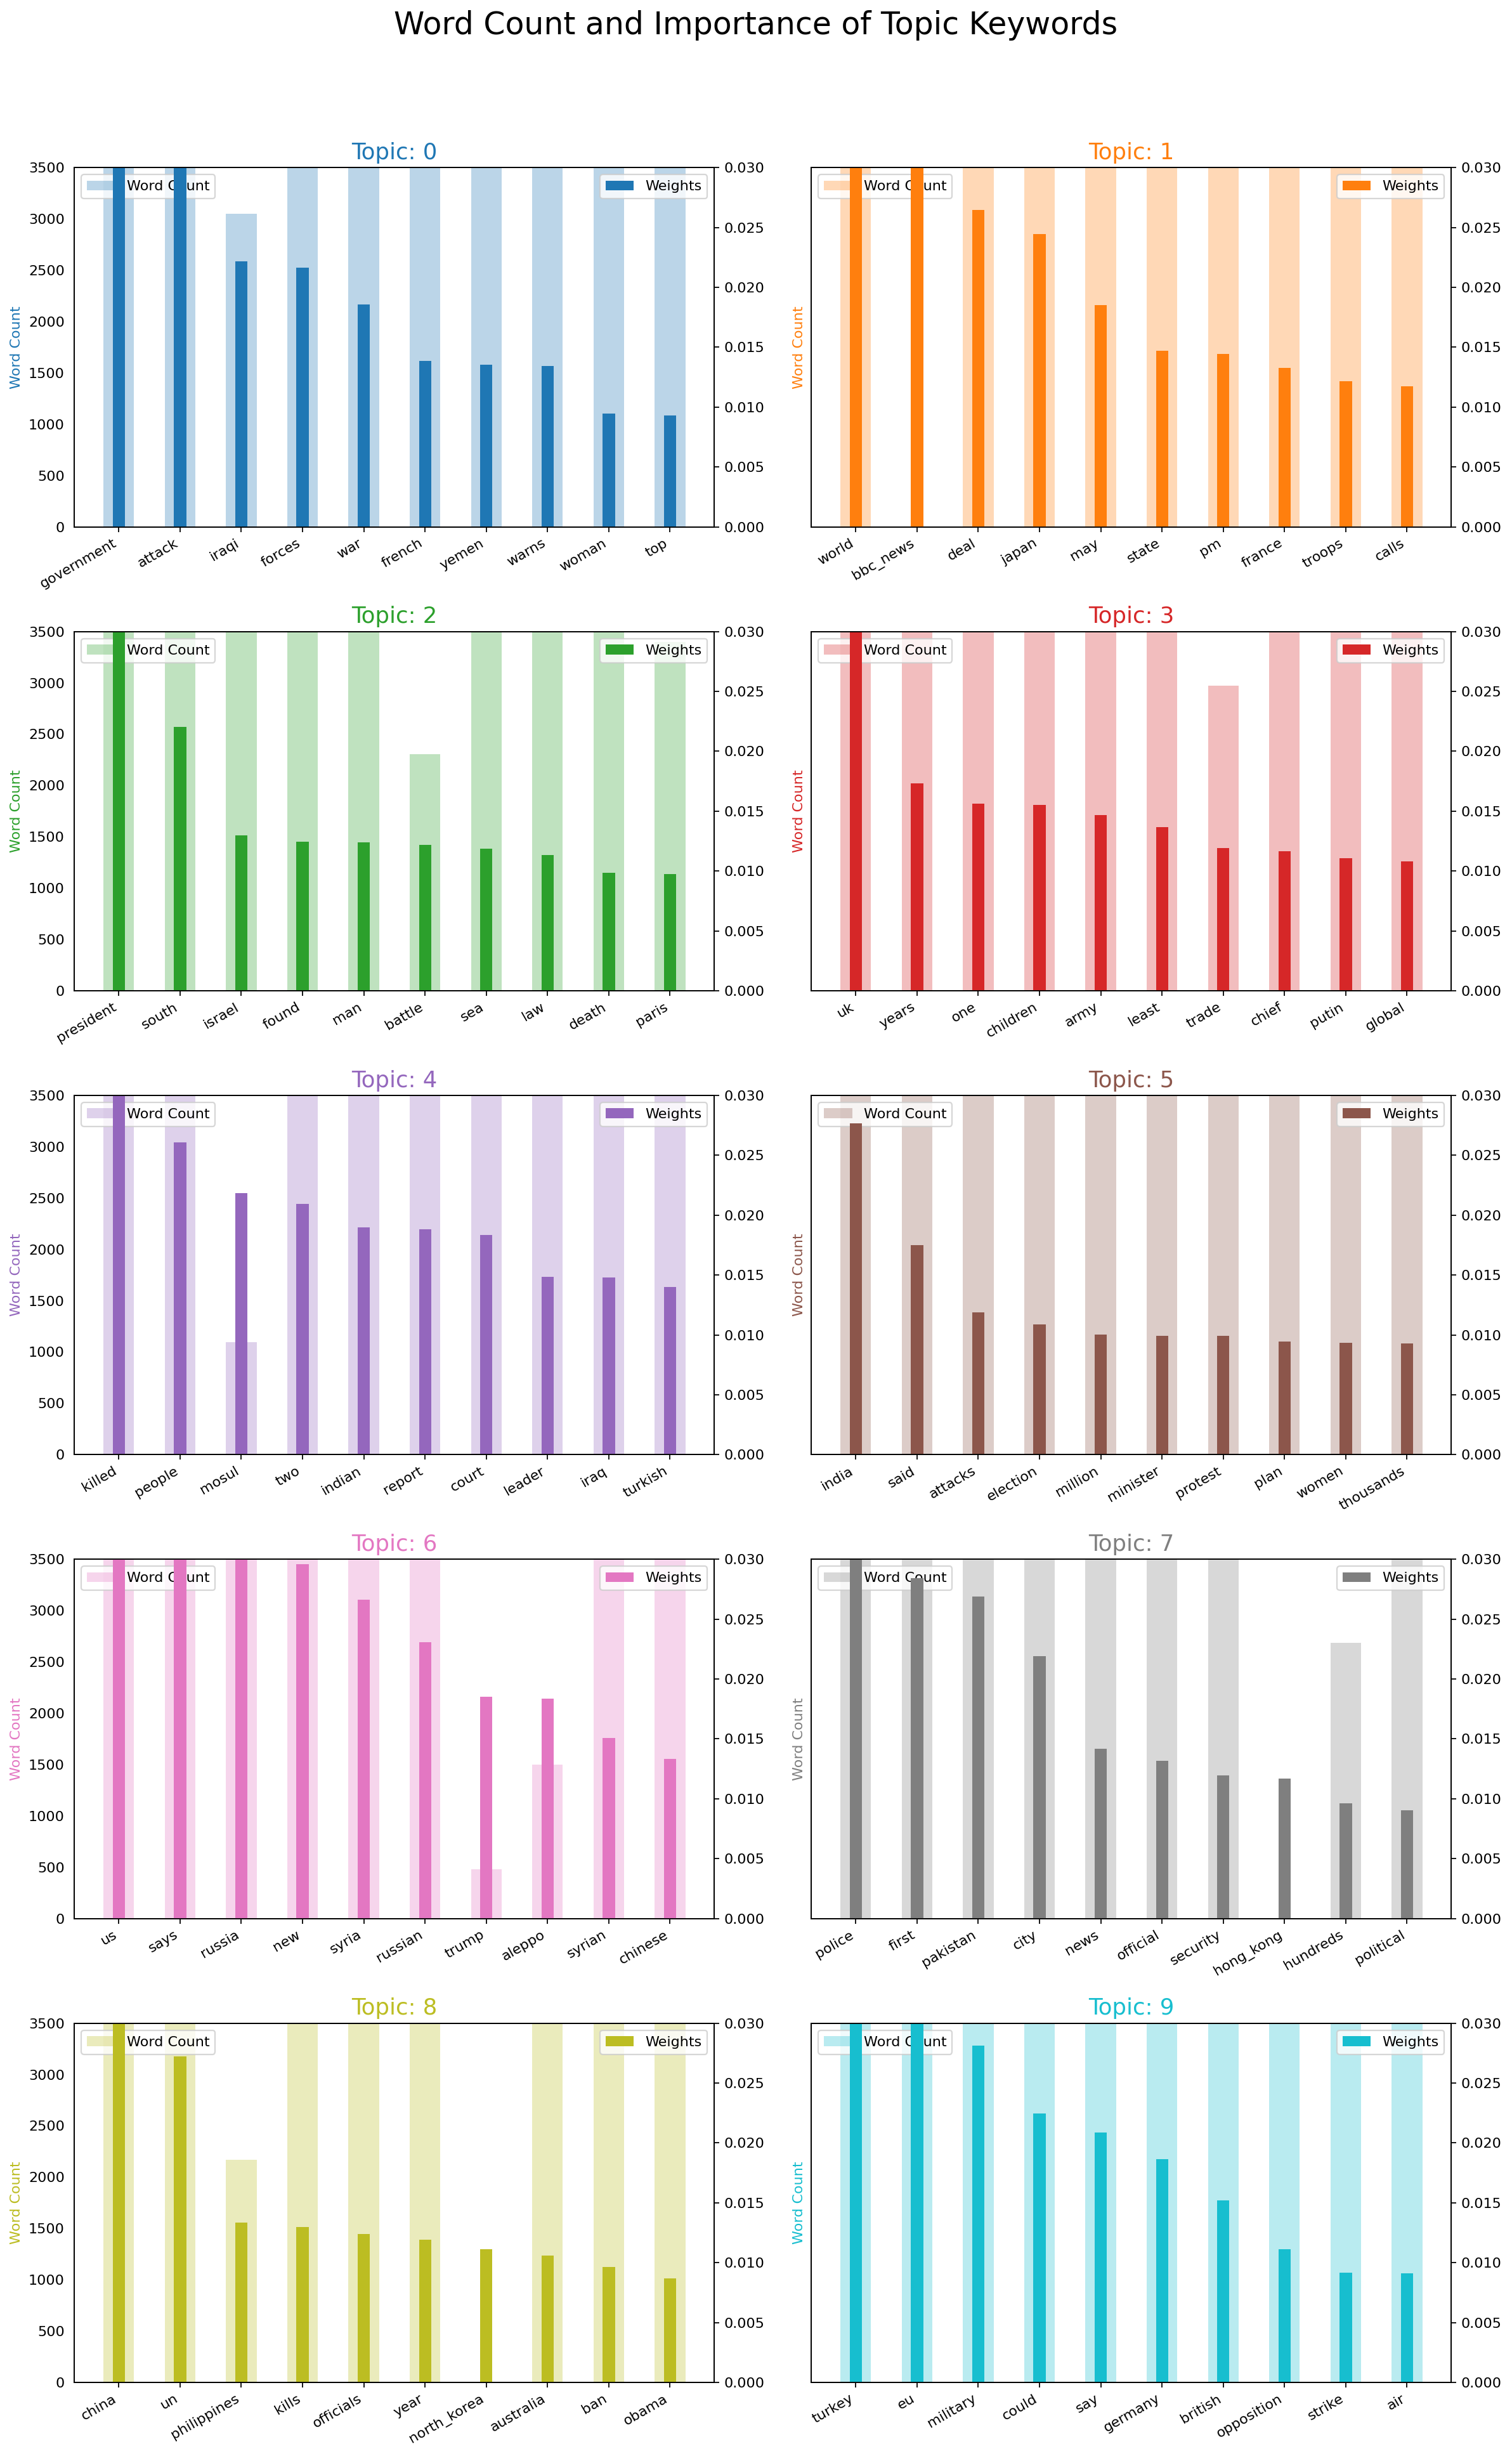

In [ ]:
#Topic visualization-1
from collections import Counter
import itertools
topics = lda_model.show_topics(formatted=False)
data_flat = list(itertools.chain.from_iterable(cleaned_list))
counter = Counter(data_flat)
out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5,2, figsize=(15,23), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)

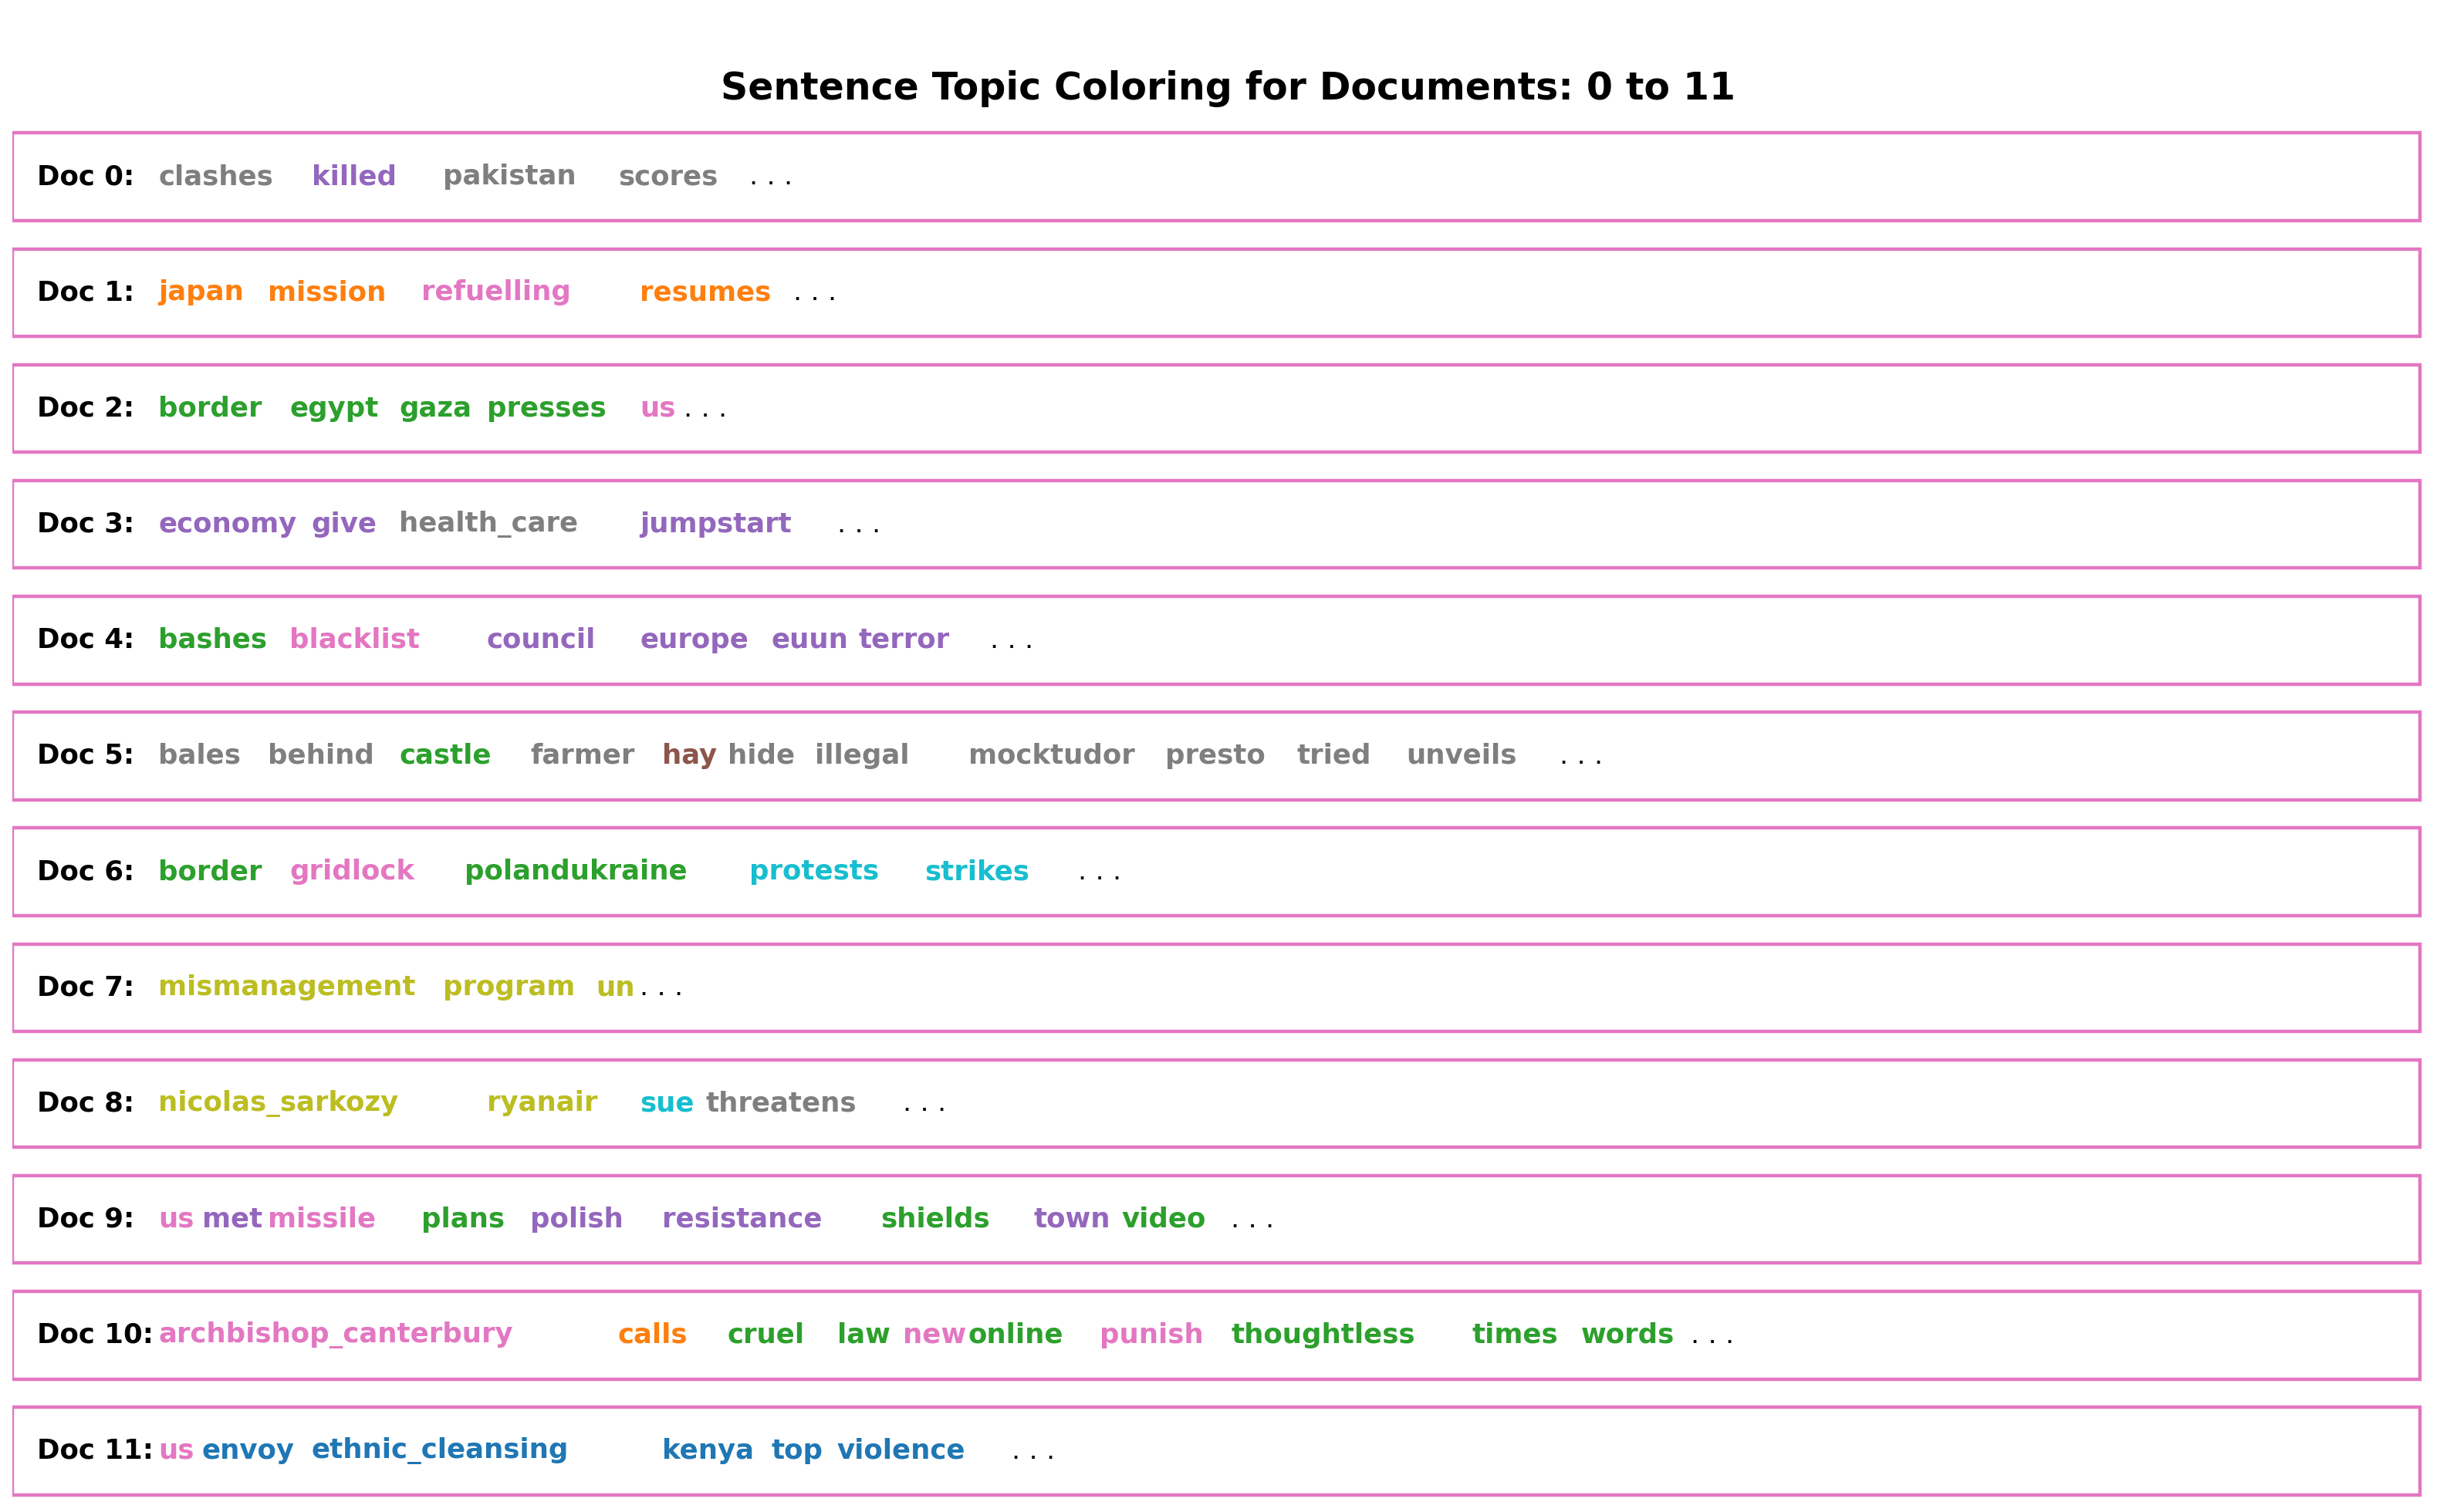

In [ ]:
#Topic visualization-2
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()  

In [77]:
#Text classification using Unsupervised Machine Learning Model
# We will give some sample sentence as input to the model & it will give out predicted cluster to which the sentence belongs.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_title'].tolist())
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [86]:
for i in range(true_k):
  print('\n\nCluster %d:' % i)
  for ind in order_centroids[i, :10]:
    print( '%s'%terms[ind])



Cluster 0:
say
china
russia
syria
attack
iran
world
year
state
korea


Cluster 1:
kill
attack
bomb
peopl
soldier
suicid
strike
pakistan
milit
civilian


Cluster 2:
new
report
news
bbc
world
say
zealand
china
govern
iran


Cluster 3:
israel
gaza
palestinian
iran
hama
say
attack
rocket
isra
netanyahu


Cluster 4:
protest
polic
thousand
clash
egypt
govern
demonstr
street
kill
hong


In [92]:
#Lets predict a sentence now!!
print('\n')
print('Prediction')
X = vectorizer.transform(['News says bomb attack killed more than 100 people'])
predicted = model.predict(X)
print(predicted)



Prediction
[2]


The prediction says the sentence is very much close to the cluster 2. 